# **Wprowadzenie do biblioteki Scikit-learn**
Scikit-learn to popularna biblioteka Python do uczenia maszynowego, oferująca szeroką gamę narzędzi do klasyfikacji, regresji, klasteryzacji oraz przetwarzania danych. 

## **1. Instalacja i import bibliotek**
`pip install scikit-learn`

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

## **2. Klasyfikacja: Rozpoznawanie gatunków irysów**
### **Opis problemu:**
Celem jest przewidzenie gatunku kwiatu na podstawie danych takich jak długość i szerokość płatków oraz działek.

### **Kroki:**
1. Załaduj dane.
2. Podziel dane na zbiór treningowy i testowy.
3. Zbuduj model klasyfikacji za pomocą RandomForest.
4. Oceń dokładność modelu.

In [13]:
# Załaduj dane
iris = load_iris()
X, y = iris.data, iris.target

# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Budowa modelu
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy:.2f}')

# Budowa modelu regresji liniowej
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

# Predykcja
y_pred2 = model2.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred2)
print(f'Dokładność modelu: {accuracy:.2f}')

Dokładność modelu: 1.00
Dokładność modelu: 1.00


## **3. Regresja: Przewidywanie cen domów**
### **Opis problemu:**
Na podstawie danych takich jak średni dochód czy populacja, model regresji ma oszacować medianową wartość domów w danym obszarze.

### **Kroki:**
1. Załaduj dane.
2. Podziel dane na zbiór treningowy i testowy.
3. Zbuduj model regresji liniowej.
4. Oblicz błąd średniokwadratowy (MSE).

In [ ]:
# Załaduj dane
data = fetch_california_housing()
X, y = data.data, data.target

# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Budowa modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
print(y_pred) # * 100,000
print(f'Błąd średniokwadratowy: {mse:.2f}')

[0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]
Błąd średniokwadratowy: 0.53


## **4. Klasteryzacja: Grupowanie danych za pomocą K-Means**
### **Opis problemu:**
Chcemy podzielić dane na grupy (klastry) w oparciu o podobieństwa między punktami.

### **Kroki:**
1. Wygeneruj dane do klasteryzacji.
2. Dopasuj model K-Means.
3. Wizualizuj wyniki.

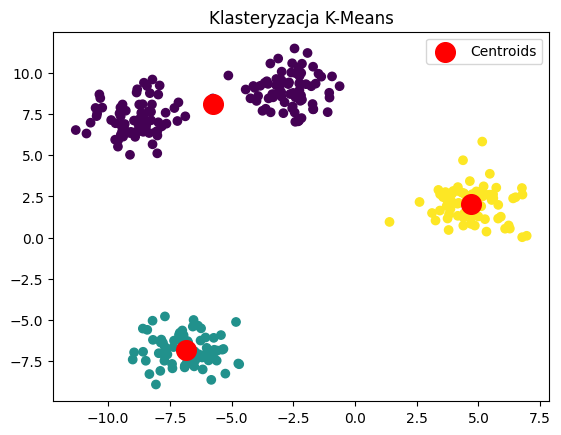

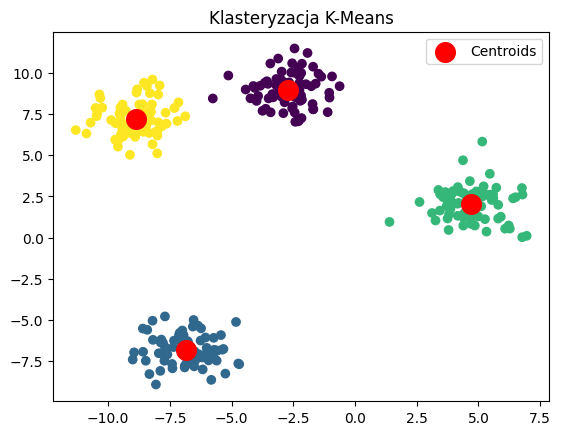

In [ ]:
# Generowanie danych
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Dopasowanie modelu K-Means - 3 grupy
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Wizualizacja wyników
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.legend()
plt.title('Klasteryzacja K-Means - 3 grupy')
plt.show()

# Dopasowanie modelu K-Means - 4 grupy
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Wizualizacja wyników
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.legend()
plt.title('Klasteryzacja K-Means - 4 grupy')
plt.show()

## **5. Przetwarzanie danych: Skalowanie i normalizacja**
Przetwarzanie danych jest kluczowe przed trenowaniem modeli ML, szczególnie dla algorytmów wrażliwych na różnice w skali zmiennych.

In [10]:
# Wyświetlenie pierwszych pięciu wierszy danych
print('Dane (pierwsze 5 wierszy):')
print(X[:5])

# Skalowanie danych za pomocą StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Wyświetlenie pierwszych pięciu wierszy przeskalowanych danych
print('Przeskalowane dane (pierwsze 5 wierszy):')
print(X_scaled[:5])

Dane (pierwsze 5 wierszy):
[[ -9.29768866   6.47367855]
 [ -9.69874112   6.93896737]
 [ -1.68665271   7.79344248]
 [ -7.09730839  -5.78133274]
 [-10.87645229   6.3154366 ]]
Przeskalowane dane (pierwsze 5 wierszy):
[[-1.11618972  0.58377179]
 [-1.19214185  0.65863295]
 [ 0.32520384  0.79611099]
 [-0.6994772  -1.38795911]
 [-1.4151792   0.55831196]]


## **6. Principal Component Analysis (PCA) – Redukcja wymiarów**
PCA zmniejsza liczbę cech w danych, zachowując jak najwięcej informacji.

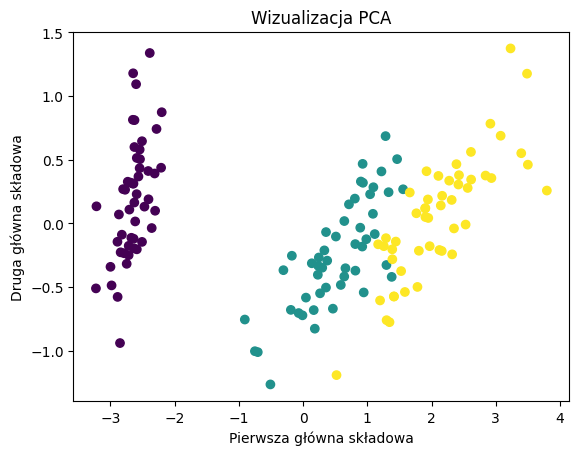

In [14]:
from sklearn.decomposition import PCA

# Dane
X, y = iris.data, iris.target

# Redukcja wymiarów do 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Wizualizacja
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("Wizualizacja PCA")
plt.xlabel("Pierwsza główna składowa")
plt.ylabel("Druga główna składowa")
plt.show()


## **7. Wybór cech (Feature Selection)**
Wybór najważniejszych cech, które mają największy wpływ na model.
Wybór cech to proces selekcji najbardziej istotnych atrybutów (kolumn) z zestawu danych, które mają największy wpływ na wynik modelu uczenia maszynowego.

Celem jest:

- Redukcja wymiarowości: Zmniejszenie liczby cech, aby uprościć model i zwiększyć jego wydajność.
- Poprawa interpretowalności: Ułatwienie zrozumienia, które zmienne są najbardziej znaczące.
- Unikanie nadmiernego dopasowania (overfitting): Eliminacja nieistotnych cech, które mogą wprowadzać szum.
- Skrócenie czasu obliczeń: Mniej cech to szybsze trenowanie i predykcja.

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

# Dane
X, y = iris.data, iris.target

# Wybór 2 najlepszych cech na podstawie ANOVA
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Wyświetlenie wyników
print("Wyniki ANOVA dla cech:", selector.scores_)
print("Wybrane cechy (pierwsze 5 wierszy):\n", X_new[:5])


Wyniki ANOVA dla cech: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
Wybrane cechy (pierwsze 5 wierszy):
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


## **Podsumowanie**
Scikit-learn to potężne narzędzie do budowy modeli uczenia maszynowego, które umożliwia szybkie prototypowanie i analizę danych. Dzięki intuicyjnemu API oraz bogatej dokumentacji, Scikit-learn jest idealnym wyborem zarówno dla początkujących, jak i zaawansowanych użytkowników.